In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
pd.set_option('display.max_columns',None)

In [49]:
data_train = pd.read_csv('titanic/train.csv')
data_test = pd.read_csv('titanic/test.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

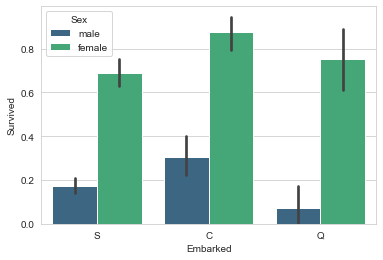

In [52]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data_train,palette='viridis')

<AxesSubplot:xlabel='Sex', ylabel='count'>

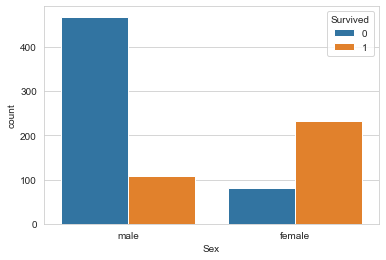

In [53]:
sns.countplot(x='Sex',data=data_train,hue='Survived')

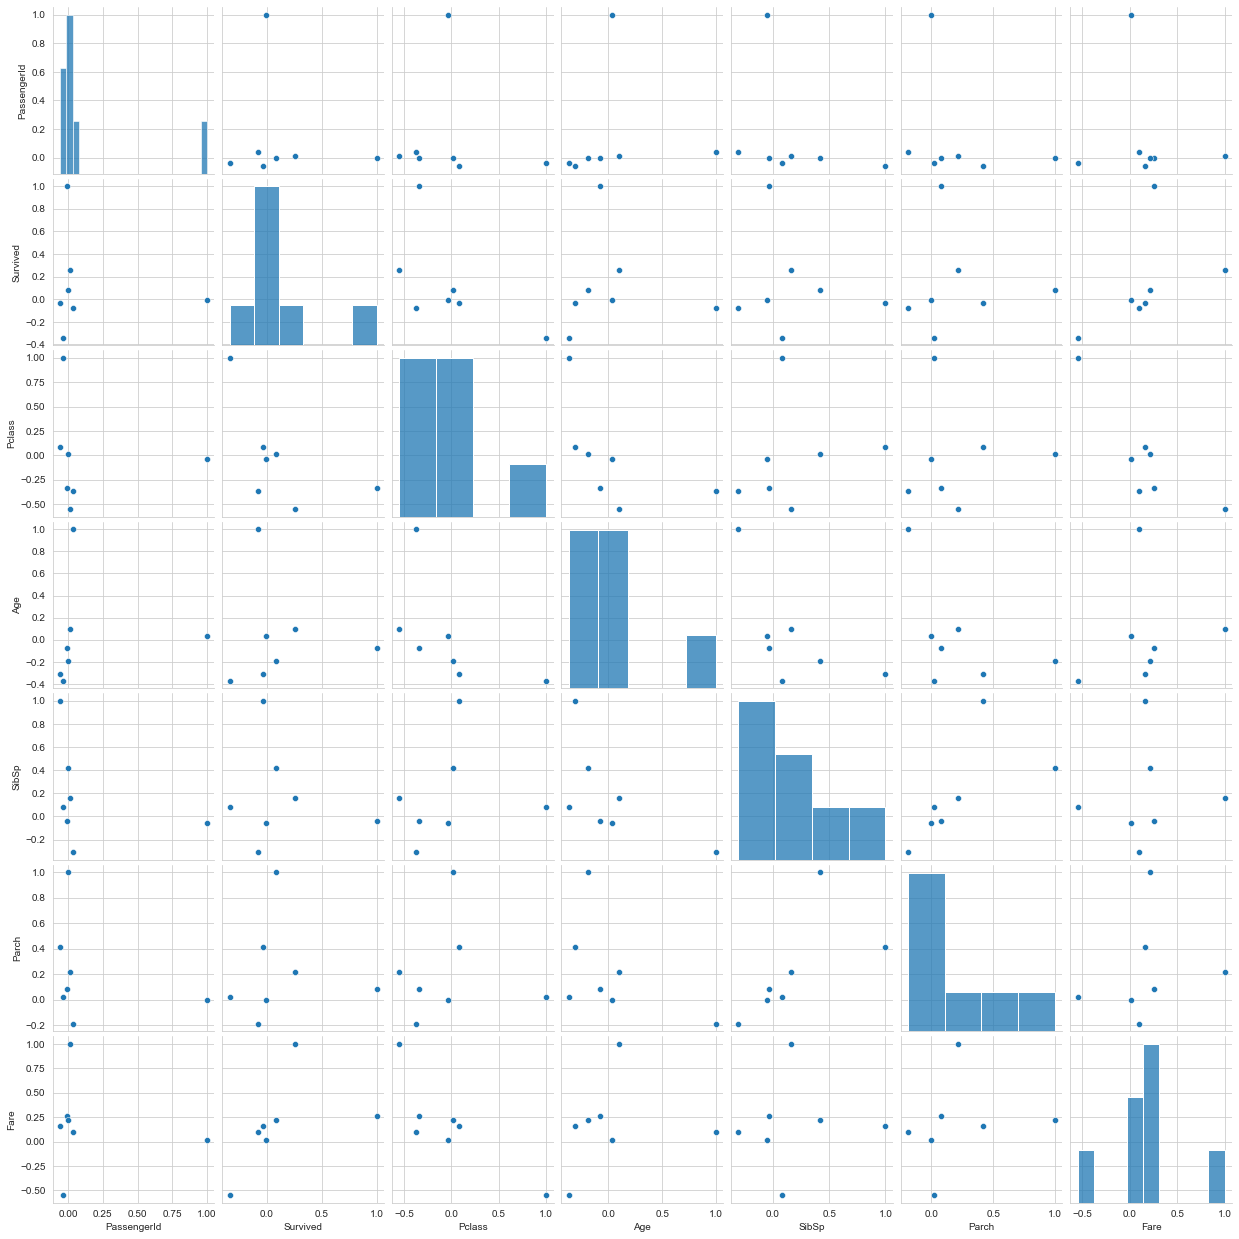

In [54]:
sns.pairplot(data_train.corr())

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

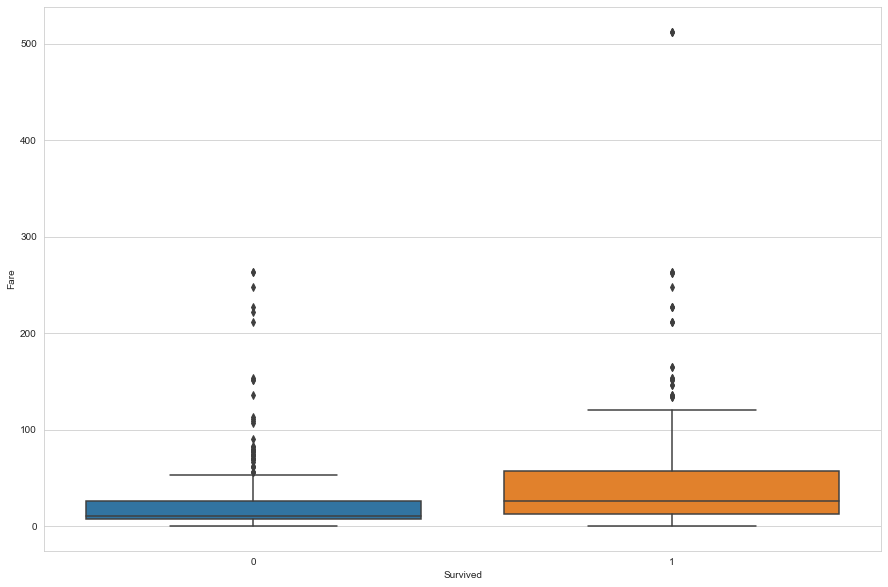

In [55]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Survived', y='Fare',data=data_train)

In [56]:
for feature in data_train.columns:
    print(feature," :: ", data_train[feature].unique())

PassengerId  ::  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 2

In [57]:
## Data Analysis

def simplify_ages(df):
    df['Age'] = df['Age'].fillna(-0.5)
    bins = (-1,0,5,12,18,25,35,60,120)
    group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
    categories = pd.cut(df['Age'], bins,labels=group_names)
    df['Age'] = categories
    return df

def simplify_cabin(df):
    df['Cabin'] = df['Cabin'].fillna('N')
    df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
    return df

def simplify_fare(df):
    df['Fare'] = df['Fare'].fillna(-0.5)
    bins = (-1,0,8,15,50,1000)
    group_names = ['Unknown','1_quartile','2_quartile','3_quartile','4_quartile']
    df['Fare'] = pd.cut(df['Fare'],bins,labels=group_names)
    return df

def simplify_name(df):
    df['LName'] = df['Name'].apply(lambda x: x.split(", ")[0])
    df['NamePrefix'] = df['Name'].apply(lambda x: x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Name','Ticket','Embarked'],axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabin(df)
    df = simplify_fare(df)
    df = simplify_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)

In [58]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LName,NamePrefix
0,1,0,3,male,Student,1,0,1_quartile,N,Braund,Mr.
1,2,1,1,female,Adult,1,0,4_quartile,C,Cumings,Mrs.
2,3,1,3,female,Young Adult,0,0,1_quartile,N,Heikkinen,Miss.
3,4,1,1,female,Young Adult,1,0,4_quartile,C,Futrelle,Mrs.
4,5,0,3,male,Young Adult,0,0,2_quartile,N,Allen,Mr.


In [59]:
print(data_train.isnull().sum())
print(data_train.info())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
LName          0
NamePrefix     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   Age          891 non-null    category
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    category
 8   Cabin        891 non-null    object  
 9   LName        891 non-null    object  
 10  NamePrefix   891 non-null    object  
dtypes: category(2), int64(5), object(4)
memory usage: 65.1+ KB
None


In [60]:
## Enconding features
from sklearn import preprocessing
def encode_features(df_train,df_test):
    cat_features = [ cat_feature for cat_feature in data_train.columns 
                if (data_train[cat_feature].dtype != 'int64') and (data_train[cat_feature].dtype != 'float64')]
    print(cat_features)
    df_combined = pd.concat([df_train[cat_features],df_test[cat_features]])
    
    for feature in cat_features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] =  le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train,df_test

data_train,data_test = encode_features(data_train,data_test)

['Sex', 'Age', 'Fare', 'Cabin', 'LName', 'NamePrefix']


In [61]:
print(data_train.head())
print(data_test.head())

   PassengerId  Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  LName  \
0            1         0       3    1    4      1      0     0      7    100   
1            2         1       1    0    0      1      0     3      2    182   
2            3         1       3    0    7      0      0     0      7    329   
3            4         1       1    0    7      1      0     3      2    267   
4            5         0       3    1    7      0      0     1      7     15   

   NamePrefix  
0          19  
1          20  
2          16  
3          20  
4          19  
   PassengerId  Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  LName  NamePrefix
0          892       3    1    7      0      0     0      7    401          19
1          893       3    0    0      1      0     0      7    846          20
2          894       2    1    3      0      0     1      7    552          19
3          895       3    1    7      0      0     1      7    854          19
4          896       3    0 

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_all = data_train.drop(['Survived'], axis=1)
y_all = data_train['Survived']

num_test = 0.20

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [65]:
# Create a new classifier 
clf = RandomForestClassifier()
paramters = {'n_estimators':[4,6,9,100],
             'max_features': ['log2', 'sqrt','auto'],
                'criterion':['gini','entropy'],
                'max_depth':[2,3,5,9],
                'min_samples_split':[2,3,5],
                'min_samples_leaf':[1,5,8]}
acc_scorer = make_scorer(accuracy_score)

grid_clf = GridSearchCV(clf,param_grid=paramters,scoring=acc_scorer,cv=5)
grid_obj = grid_clf.fit(X_train,y_train)

In [66]:
clf = grid_obj.best_estimator_

In [67]:
clf.fit(X_train,y_train)
import pickle
file = open('rf_clf.pkl','wb')
pickle.dump(clf.fit(X_train,y_train),file)
file.close()

In [68]:
pred = clf.predict(X_test)
print(accuracy_score(pred,y_test))

0.8212290502793296


In [69]:
X_all

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,LName,NamePrefix
0,1,3,1,4,1,0,0,7,100,19
1,2,1,0,0,1,0,3,2,182,20
2,3,3,0,7,0,0,0,7,329,16
3,4,1,0,7,1,0,3,2,267,20
4,5,3,1,7,0,0,1,7,15,19
...,...,...,...,...,...,...,...,...,...,...
886,887,2,1,7,0,0,1,7,535,26
887,888,1,0,4,0,0,2,1,294,16
888,889,3,0,6,1,2,2,7,383,16
889,890,1,1,7,0,0,2,2,69,19


In [70]:
## NOW we will validate our classifier against test dataset

In [71]:
from sklearn.model_selection import KFold
def run_kfold(clf):
    kf =KFold(n_splits=10)
    outcomes = []
    fold = 0
    print(kf.get_n_splits(X_all))
    for train_index, test_index in kf.split(X_all):
        fold += 1
        X_train,X_test = X_all.values[train_index],X_all.values[test_index]
        y_train,y_test = y_all.values[train_index],y_all.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        acc_score = accuracy_score(y_test,pred)
        outcomes.append(acc_score)
        print("Fold{} has accuracy of {}".format(fold,acc_score))
    print("Mean accuracy is",np.mean(outcomes))

run_kfold(clf)


10
Fold1 has accuracy of 0.7777777777777778
Fold2 has accuracy of 0.8651685393258427
Fold3 has accuracy of 0.797752808988764
Fold4 has accuracy of 0.8539325842696629
Fold5 has accuracy of 0.8651685393258427
Fold6 has accuracy of 0.8426966292134831
Fold7 has accuracy of 0.7865168539325843
Fold8 has accuracy of 0.8314606741573034
Fold9 has accuracy of 0.8539325842696629
Fold10 has accuracy of 0.8089887640449438
Mean accuracy is 0.8283395755305868


In [72]:

## predictions --
data_test.head()
ids = data_test['PassengerId']
predictions = clf.predict(data_test.drop(['PassengerId'],axis=1))
output = pd.DataFrame({'PassengerId':ids,'Survived': predictions})


ValueError: X has 9 features, but DecisionTreeClassifier is expecting 10 features as input.

In [ ]:
sns.countplot(x='Survived',data=output)